# Pair Programming Test Estadísticos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,8) 

/home/lolaru/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/lolaru/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

Happy coding💪🏽

In [2]:
sales = pd.read_csv("../DA-PromoC-Modulo3-Sprint1-Lola-Noemi/ficheros/sales2.csv", index_col=0)
sales.sample(7)

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,...,budget_cogs,budget_margin,budget_sales,productid,date,product_type,product,type,mes,año
3556,816,Missouri,Central,Small Market,50.0,74.0,145.0,62.0,40.0,19.0,...,60.0,80.0,140.0,3,2011-09-01,Coffee,Decaf Irish Cream,Decaf,9,2011
1314,435,Utah,West,Small Market,-16.0,53.0,101.0,37.0,66.0,34.0,...,20.0,40.0,60.0,11,2011-01-01,Tea,Darjeeling,Regular,1,2011
4199,978,Massachusetts,East,Major Market,40.0,76.0,138.0,52.0,46.0,17.0,...,40.0,70.0,130.0,2,2011-07-01,Coffee,Columbian,Regular,7,2011
3617,845,New York,East,Major Market,40.0,-56.0,69.0,125.0,46.0,22.0,...,110.0,-60.0,50.0,5,2010-10-01,Espresso,Caffe Mocha,Regular,10,2010
3783,914,New York,East,Major Market,40.0,76.0,138.0,60.0,90.0,66.0,...,50.0,70.0,130.0,7,2011-04-01,Espresso,Regular Espresso,Regular,4,2011
2484,618,Illinois,Central,Major Market,197.0,179.0,322.0,123.0,46.0,34.0,...,110.0,170.0,280.0,8,2011-12-01,Herbal Tea,Chamomile,Decaf,12,2011
1456,503,Oregon,West,Small Market,28.0,63.0,109.0,47.0,40.0,15.0,...,40.0,60.0,100.0,5,2011-07-01,Espresso,Caffe Mocha,Regular,7,2011



### ¿Qué diferencia existe el error de tipo I y el error de tipo II?

- H0: No aumenta el beneficio con el marketing ni las ventas.
- H1: El beneficio aumenta con el marketing y las ventas.


Error de Tipo I: Decimos que no aumenta, cuando sí aumenta.

Error de Tipo II: Decimos que aumenta, cuando realmente no aumenta.

El error de Tipo II es el que no nos interesa cometer, dado que nuestra empresa sufriría pérdidas.

### ¿Qué es la asimetría?

- La asimetría se produce cuando la distribución de los datos se aleja de la media. Puede ser positiva o negativa. 

### ¿Es vuestra variable respuesta asimétrica?

In [3]:
sales["profit"].skew()

1.055870460824596

- En este caso, vemos que nuestra variable respuesta tiene una distribución asimétrica positiva, es decir, mayor que 0 y, por lo tanto, los datos no son normales. Su media es mayor que la mediana y la moda.

### ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [4]:
kurtosistest(sales["profit"])

KurtosistestResult(statistic=8.589216828780973, pvalue=8.756413236225312e-18)

- Vemos que nuestro p-valor es menor que 0.05, lo que nos indica este test es que los datos no son normales y podemos rechazar la H0.

### ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [5]:
# probamos el test Shapiro para ver si nuestra variable respuesta es normal

stats.shapiro(sales["profit"])

ShapiroResult(statistic=0.9109626412391663, pvalue=1.8216880036222622e-44)

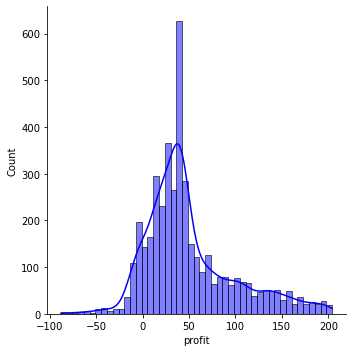

In [6]:
sns.displot(sales["profit"], kde = True, color = "blue");

- Como observamos con el test Shapiro y el displot, nuestra variable respuesta no tiene una distribución normal y es asimétrica, ya que su forma se aleja a la forma de una campana de Gauss.

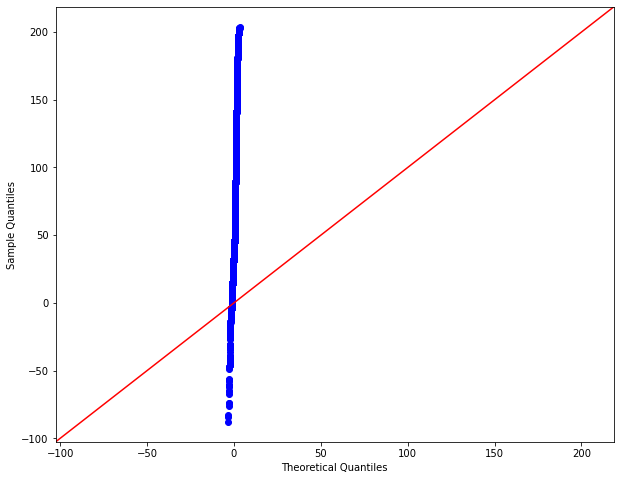

In [7]:
sm.qqplot(sales["profit"], line ='45');

- Como observamos en el qqplot, nuestra variable no está nada ajustada a la recta, lo cual nos indica una distribución no normal.